## Examines measures for small open field analysis

In [2]:
# data handling & io
import numpy as np
import pandas as pd
import glob

# plotting
import seaborn as sns
import matplotlib.pyplot as plt
import dabest

tex_fonts = {
#     # Use LaTeX to write all text
#     "text.usetex": True,
    "font.family": "serif",
    # Use 10pt font in plots, to match 10pt font in document
    "axes.labelsize": 10,
    "font.size": 10,
    # Make the legend/label fonts a little smaller
    "legend.fontsize": 8,
    "xtick.labelsize": 8,
    "ytick.labelsize": 8
}
plt.style.use('seaborn-paper')
plt.rcParams.update(tex_fonts)

%config InlineBackend.figure_format = 'retina'

### Helper functions


In [4]:
def set_size(width, fraction=1, subplots=(1, 1)):
    """Set figure dimensions to avoid scaling in LaTeX.
    Parameters
    ----------
    width: float or string
            Document width in points, or string of predined document type
    fraction: float, optional
            Fraction of the width which you wish the figure to occupy
    subplots: array-like, optional
            The number of rows and columns of subplots.
    Returns
    -------
    fig_dim: tuple
            Dimensions of figure in inches
    """
    if width == 'thesis':
        width_pt = 426.79135
    elif width == 'beamer':
        width_pt = 307.28987
    else:
        width_pt = width

    # Width of figure (in pts)
    fig_width_pt = width_pt * fraction
    # Convert from pt to inches
    inches_per_pt = 1 / 72.27

    # Golden ratio to set aesthetic figure height
    # https://disq.us/p/2940ij3
    golden_ratio = (5**.5 - 1) / 2

    # Figure width in inches
    fig_width_in = fig_width_pt * inches_per_pt
    # Figure height in inches
    fig_height_in = fig_width_in * golden_ratio * (subplots[0] / subplots[1])

    return (fig_width_in, fig_height_in)

def lineplot(df,grouping,x,y):
    # Matplotlib plot with custom error band

  
    
    y_mean = df.groupby(grouping).mean()[y]
    x = y_mean.index

    # Compute upper and lower bounds using chosen uncertainty measure: here
    # it is a fraction of the standard deviation of measurements at each
    # time point based on the unbiased sample variance
    y_std = df.groupby('timepoint').std()['signal']
    error = 0.5*y_std
    lower = y_mean - error
    upper = y_mean + error

    # Draw plot with error band and extra formatting to match seaborn style
    fig, ax = plt.subplots(figsize=(9,5))
    ax.plot(x, y_mean, label='signal mean')
    ax.plot(x, lower, color='tab:blue', alpha=0.1)
    ax.plot(x, upper, color='tab:blue', alpha=0.1)
    ax.fill_between(x, lower, upper, alpha=0.2)
    ax.set_xlabel('timepoint')
    ax.set_ylabel('signal')
    ax.spines['top'].set_visible(False)
    ax.spines['right'].set_visible(False)
    plt.show()

In [6]:
fig_save_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/figs/'

# paths 
data_path = '/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/small_of_paths/'
file_paths = glob.glob(data_path+'*.csv')

# data table 
df = pd.read_csv('/Users/lauraberkowitz/github/TgF344-AD_Open_Field/notebooks/data/small_open_field_measures.csv')
df.head()

,subID,group,day,time_point,thigmotaxis,median_velocity,path_length,search_area,n_stops,median_stop_duration,median_inter_stop_interval,time_in_homebase,hb_stop_distance,hb_close_stops,time2hb,n_home_bases,hb_dist_to_wall
0,100,tg,1,4,384.111111,5.807395,472.814581,0.186667,27.0,6.888889,11.166667,248.111111,11.199967,26.0,16.308,2.0,3.938324
1,100,tg,1,7,543.222222,5.539001,237.179367,0.154286,24.0,8.555556,15.111111,224.333333,9.400335,24.0,272.082,2.0,3.309842
2,100,tg,2,4,525.444444,7.774417,836.480060,0.333333,23.0,6.000000,10.277778,183.777778,14.057677,18.0,35.904,3.0,4.012047
3,100,tg,2,7,544.777778,5.426612,242.663387,0.133333,30.0,5.777778,8.666667,316.000000,13.598290,26.0,171.227,1.0,4.539671
4,100,tg,3,4,476.333333,7.345520,695.178425,0.295238,23.0,6.777778,10.444444,246.111111,19.911543,15.0,206.143,2.0,6.958030


### Hypothesis: TgF344-AD will exhibit increased locomotion relative to controls with no habituation across sessions within a time point.

Let's start by examining path length across days and time points between groups 

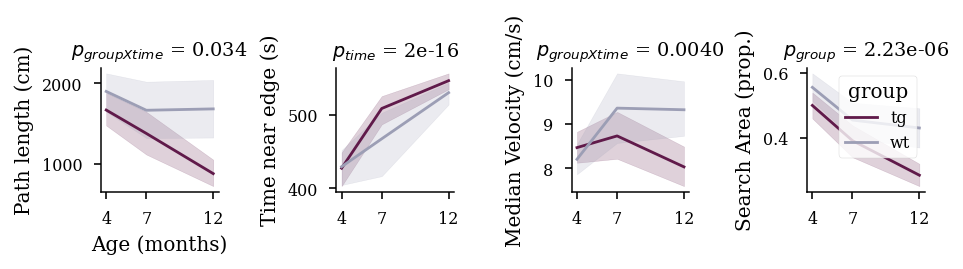

In [168]:
fig, axs = plt.subplots(1,4, figsize=set_size('thesis', fraction=1.25, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 1.5 , wspace=1)

flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.

sns.lineplot(
    data=df, x="time_point", y="path_length", hue="group",
    palette = flatui,ax=axs[0])

sns.lineplot(
    data=df, x="time_point", y="thigmotaxis", hue="group",
    palette = flatui,ax=axs[1])
sns.lineplot(
    data=df, x="time_point", y="median_velocity", hue="group",
    palette = flatui,ax=axs[2])
sns.lineplot(
    data=df, x="time_point", y="search_area", hue="group",
    palette = flatui,ax=axs[3])

for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].spines['left'].set_linewidth(0.75)
    axs[i].spines['bottom'].set_linewidth(0.75)
    
axs[0].legend([],[], frameon=False)
axs[1].legend([],[], frameon=False)
axs[2].legend([],[], frameon=False)

axs[0].set_ylabel('Path length (cm)')
axs[1].set_ylabel('Time near edge (s)')
axs[2].set_ylabel('Median Velocity (cm/s)')
axs[3].set_ylabel('Search Area (prop.)')

axs[0].set_xticks([4,7,12])
axs[1].set_xticks([4,7,12])
axs[2].set_xticks([4,7,12])
axs[3].set_xticks([4,7,12])

axs[0].set_xlabel('Age (months)')
axs[1].set_xlabel('')
axs[2].set_xlabel('')
axs[3].set_xlabel('')

axs[0].set_title(r'$p_{groupXtime}$ = 0.034')
axs[1].set_title(r'$p_{time}$ = 2e-16')
axs[2].set_title(r'$p_{groupXtime}$ = 0.0040')
axs[3].set_title(r'$p_{group}$ = 2.23e-06')

plt.savefig(fig_save_path+'small_OF_locomotion.svg',dpi=300,bbox_inches='tight')


/opt/anaconda3/envs/drift/lib/python3.9/site-packages/seaborn/categorical.py:2802: UserWarning: The `split` parameter has been renamed to `dodge`.
  warnings.warn(msg, UserWarning)


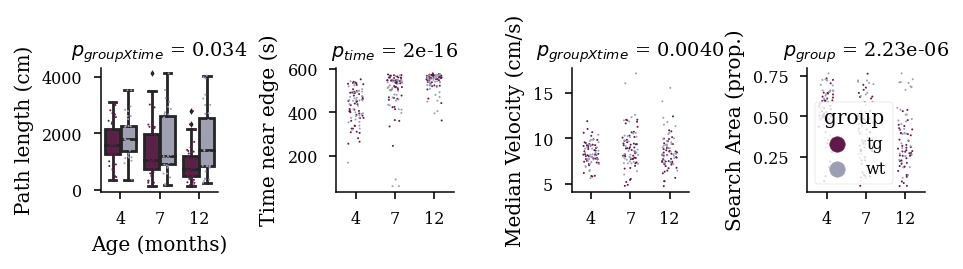

In [19]:
fig, axs = plt.subplots(1,4, figsize=set_size('thesis', fraction=1.25, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 1.5 , wspace=1)

flatui = ["#601a4a","#9c9eb5"]   #color schedule for Tg and Wt, respectively.

sns.boxplot(data=df, x="time_point", y="path_length", hue="group",palette=flatui,fliersize=1,ax=axs[0])
sns.stripplot(
    data=df, x="time_point", y="path_length", hue="group",jitter=0.2,s=1,
    palette = flatui,ax=axs[0],split=True)

sns.stripplot(
    data=df, x="time_point", y="thigmotaxis", hue="group",jitter=0.2,s=1,
    palette = flatui,ax=axs[1])
sns.stripplot(
    data=df, x="time_point", y="median_velocity", hue="group",jitter=0.2,s=1,
    palette = flatui,ax=axs[2])
sns.stripplot(
    data=df, x="time_point", y="search_area", hue="group",jitter=0.2,s=1,
    palette = flatui,ax=axs[3])

for i in range(4):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].spines['left'].set_linewidth(0.75)
    axs[i].spines['bottom'].set_linewidth(0.75)
    
axs[0].legend([],[], frameon=False)
axs[1].legend([],[], frameon=False)
axs[2].legend([],[], frameon=False)

axs[0].set_ylabel('Path length (cm)')
axs[1].set_ylabel('Time near edge (s)')
axs[2].set_ylabel('Median Velocity (cm/s)')
axs[3].set_ylabel('Search Area (prop.)')

# axs[0].set_xticks([4,7,12])
# axs[1].set_xticks([4,7,12])
# axs[2].set_xticks([4,7,12])
# axs[3].set_xticks([4,7,12])

axs[0].set_xlabel('Age (months)')
axs[1].set_xlabel('')
axs[2].set_xlabel('')
axs[3].set_xlabel('')

axs[0].set_title(r'$p_{groupXtime}$ = 0.034')
axs[1].set_title(r'$p_{time}$ = 2e-16')
axs[2].set_title(r'$p_{groupXtime}$ = 0.0040')
axs[3].set_title(r'$p_{group}$ = 2.23e-06')

plt.savefig(fig_save_path+'small_OF_locomotion.svg',dpi=300,bbox_inches='tight')


## Examine stops 

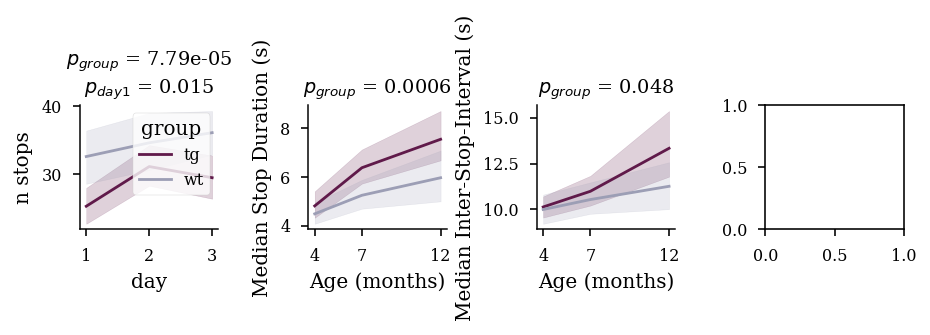

In [170]:

fig, axs = plt.subplots(1,4, figsize=set_size('thesis', fraction=1.25, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 1.5 , wspace=.65)

sns.lineplot(
    data=df, x="day", y="n_stops", hue="group",
    palette = flatui,ax=axs[0])

sns.lineplot(
    data=df, x="time_point", y="median_stop_duration", hue="group",
    palette = flatui,ax=axs[1])

sns.lineplot(
    data=df, x="time_point", y="median_inter_stop_interval", hue="group",
    palette = flatui,ax=axs[2])

for i in range(3):
    right_side = axs[i].spines["right"]
    right_side.set_visible(False)
    top_side = axs[i].spines["top"]
    top_side.set_visible(False)
    axs[i].spines['left'].set_linewidth(0.75)
    axs[i].spines['bottom'].set_linewidth(0.75)
    
axs[0].legend([],[], frameon=False)
axs[1].legend([],[], frameon=False)
axs[2].legend([],[], frameon=False)

axs[0].set_ylabel('n stops')
axs[1].set_ylabel('Median Stop Duration (s)')
axs[2].set_ylabel('Median Inter-Stop-Interval (s)')

axs[0].set_xticks([1,2,3])
axs[1].set_xticks([4,7,12])
axs[2].set_xticks([4,7,12])

axs[0].set_xlabel('day')
axs[1].set_xlabel('Age (months)')
axs[2].set_xlabel('Age (months)')

axs[0].set_title(r'$p_{group}$ = 7.79e-05' "\n" r'$p_{day1}$ = 0.015')
axs[1].set_title(r'$p_{group}$ = 0.0006')
axs[2].set_title(r'$p_{group}$ = 0.048')

plt.savefig(fig_save_path+'small_OF_stops.svg',dpi=300,bbox_inches='tight')


## Paths for same animal across time example (color code by velocity)


## stop plots overall stops between groups stops color coded by time poin


## Home distance from wall

<AxesSubplot:xlabel='time_point', ylabel='time_in_homebase'>

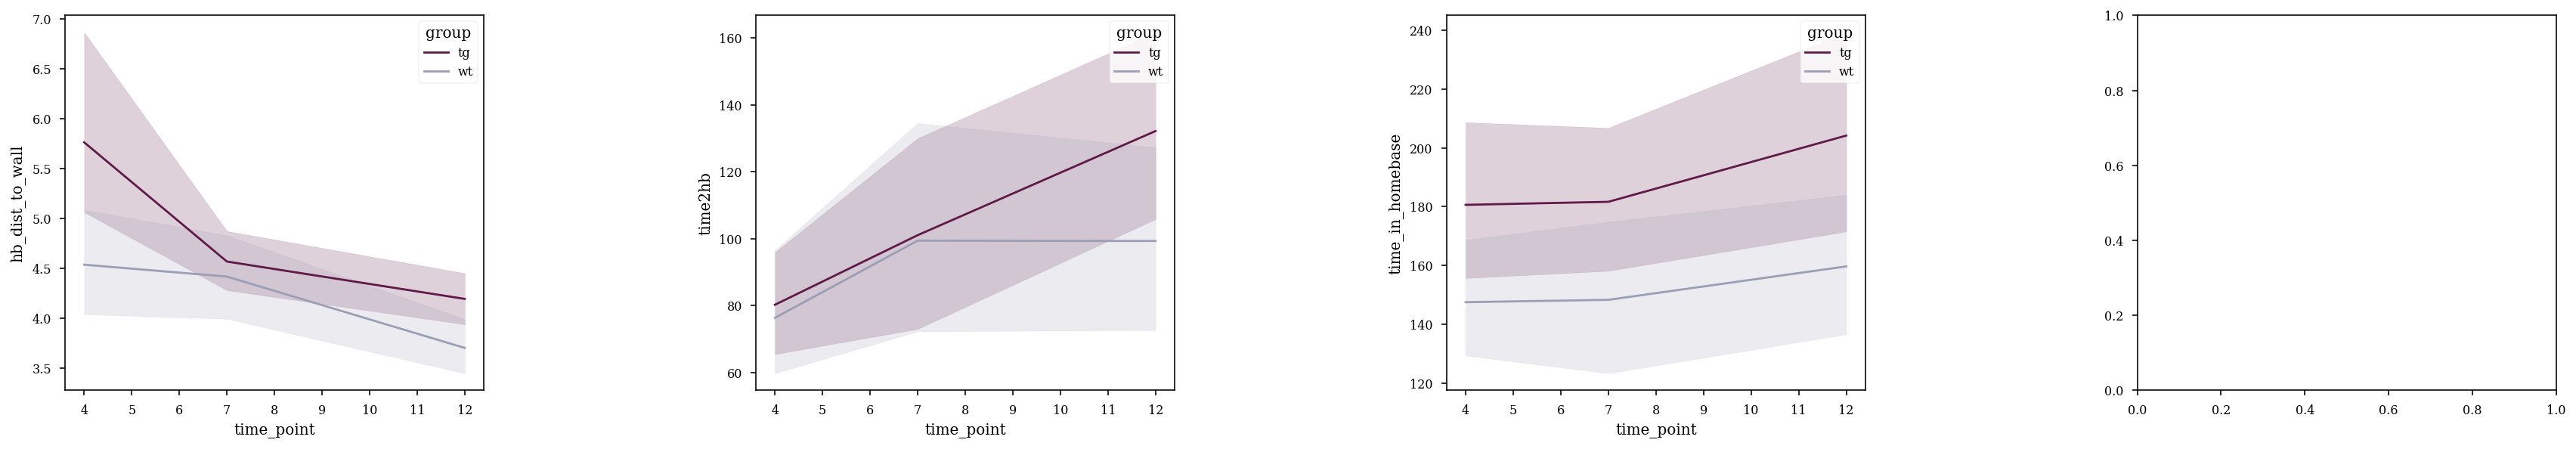

In [181]:
fig, axs = plt.subplots(1,4, figsize=set_size('thesis', fraction=5, subplots=(1, 4)), edgecolor='k')
fig.subplots_adjust(hspace = 1.5 , wspace=.65)

sns.lineplot(
    data=df, x="time_point", y="hb_dist_to_wall", hue="group",
    palette = flatui,ax=axs[0])

sns.lineplot(
    data=df, x="time_point", y="time2hb", hue="group",
    palette = flatui,ax=axs[1])

sns.lineplot(
    data=df, x="time_point", y="time_in_homebase", hue="group",
    palette = flatui,ax=axs[2])
